## Machine Predictive Maintenance Classification Dataset

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

    * UID: unique identifier ranging from 1 to 10000
    * productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
    * Air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
    * Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
    * Rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
    * Torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
    * Tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
    'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.

    Target : Failure or Not
    Failure Type : Type of Failure

Acknowledgements:

UCI : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [1]:
# Assessment_1: Zolnoi Innovations
# Submitted by: Raghavendra Tapas
# Email: raghutapas12@gmail.com

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Importing Data Set
df = pd.read_csv('predictive_maintenance.csv')

# viewing upper portion of dataset
df.head(2)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure


## Initial Assumptions and Observations:

* Before we proceed to analyse the above data, it is necessary to understand the possible assumptions that might have been made during data collection.
* This data talks about torque and toolwear, so I believe we are assuming the machines are carrying out CNC milling or machining operations.
* For each material that is about to get machined, the optimal parameters of rotational speed, torque, tool wear rate, process temp is going to vary.
* Therefore, we are going to assume that the material of the tool or machining block at any any point of this particular data collection remained unchanged.

In [4]:
# How many unique values are there in the Target Variables and Predictors Variables?
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [5]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [6]:
# What are the unique values in Target Variable: Failure Type
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [7]:
# What are the unique values in Target Variable: Target
df['Target'].unique()

array([0, 1], dtype=int64)

###  We may want to see just how many unique UDI failed due to specific failure type?
* To do so, we can first filter out only target variables and UDI columns.

In [8]:
df1 = df[['UDI', 'Failure Type', 'Target']]
df1.head()

,UDI,Failure Type,Target
0,1,No Failure,0
1,2,No Failure,0
2,3,No Failure,0
3,4,No Failure,0
4,5,No Failure,0


In [9]:
df3 = df1.groupby(['Failure Type']).count()
df3

,UDI,Target
Failure Type,,
Heat Dissipation Failure,112,112
No Failure,9652,9652
Overstrain Failure,78,78
Power Failure,95,95
Random Failures,18,18
Tool Wear Failure,45,45


In [10]:
failure = 112 + 78 + 95 + 18 + 45
no_failure = 9652
total = failure + no_failure
percentage_failure = (failure/total) * 100
percentage_noFailure = (no_failure/total) * 100
print(f'Failure = {percentage_failure} %\nNo Failure = {percentage_noFailure} %')

Failure = 3.4799999999999995 %
No Failure = 96.52 %


**Key Learning**

* Case 1: The dataset that we have is skewed towards having data that contains records of no failures.
* Case 2: The system peforms well by having only approximately 4 % failure rate.

In [11]:
# Filter out the row
df_failures_only = df1[df1['Failure Type'] != 'No Failure']

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

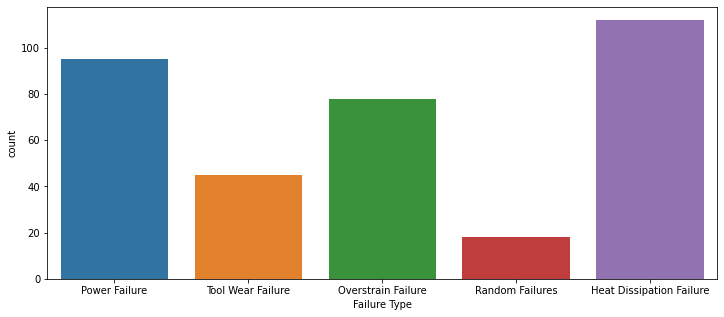

In [12]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plotting the counts
sns.countplot(x = 'Failure Type', data = df_failures_only)

**Key Learning**

* Most failure occur due to Heat dissipation, followed by power failure and over strain failure.

In [13]:
# Filter the no failure rows out and check the counts.
df_failures_only = df[df['Failure Type'] != 'No Failure']
# df_failures_only.head(1)

<AxesSubplot:xlabel='Type', ylabel='count'>

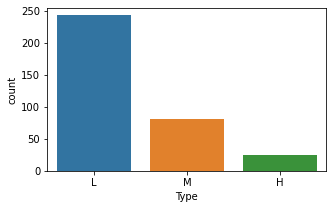

In [14]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(5, 3))

# Plotting the counts
sns.countplot(x = 'Type', data = df_failures_only)

### Key Learning about predictor variable "Type":

Consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number.

* Since the product quality is lowest in L and high in H types respectively, it only makes sense why most failures occured with L types and M types second.
* L Types have highest counts of failure, M type has second highest counts of failure.

## Pearson Co-Relation:

Co-relation is a good statistical indicator to measure and start testing some hypothesis. To prevent data leakage, we can simply remove Target variables. 

### Note:

To determine where the variables are dependent or in-dependent variables, we may need to carry out some hypothesis formation and testing or do some causality tests. It is not done in this study.

In [15]:
drop_df = df.drop(['UDI'],axis=1)

In [16]:
corr = df.corr(method='pearson', min_periods=1)
corr.style.background_gradient(cmap='coolwarm')

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


Wall time: 0 ns


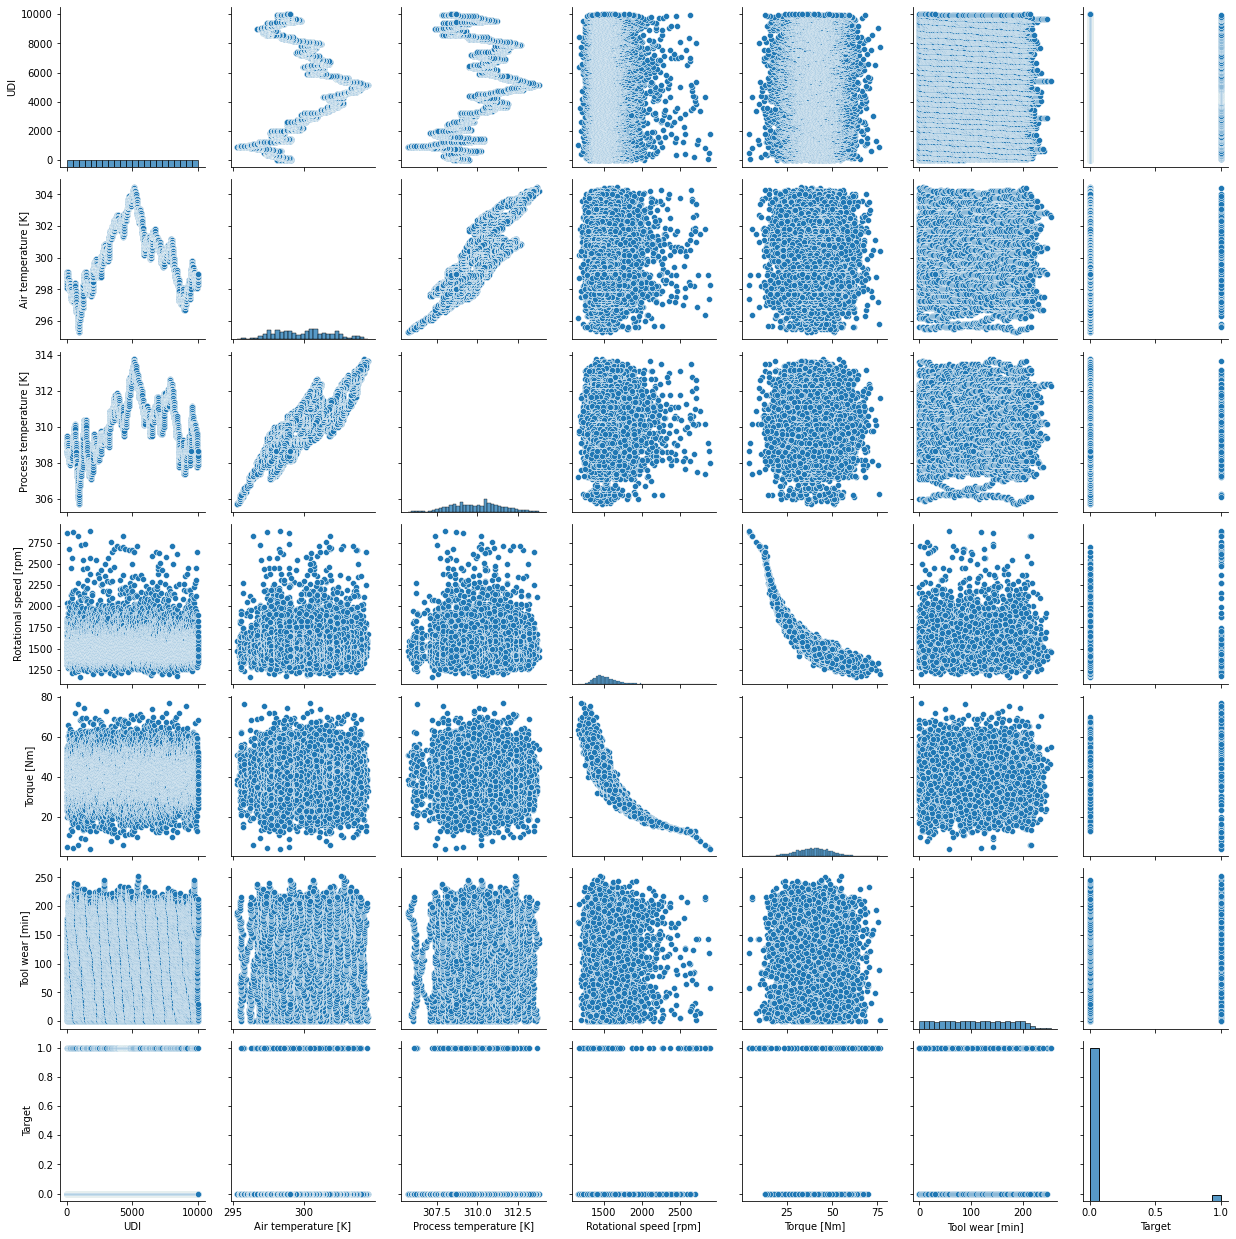

In [17]:
sns.pairplot(df,palette='bright')
%time

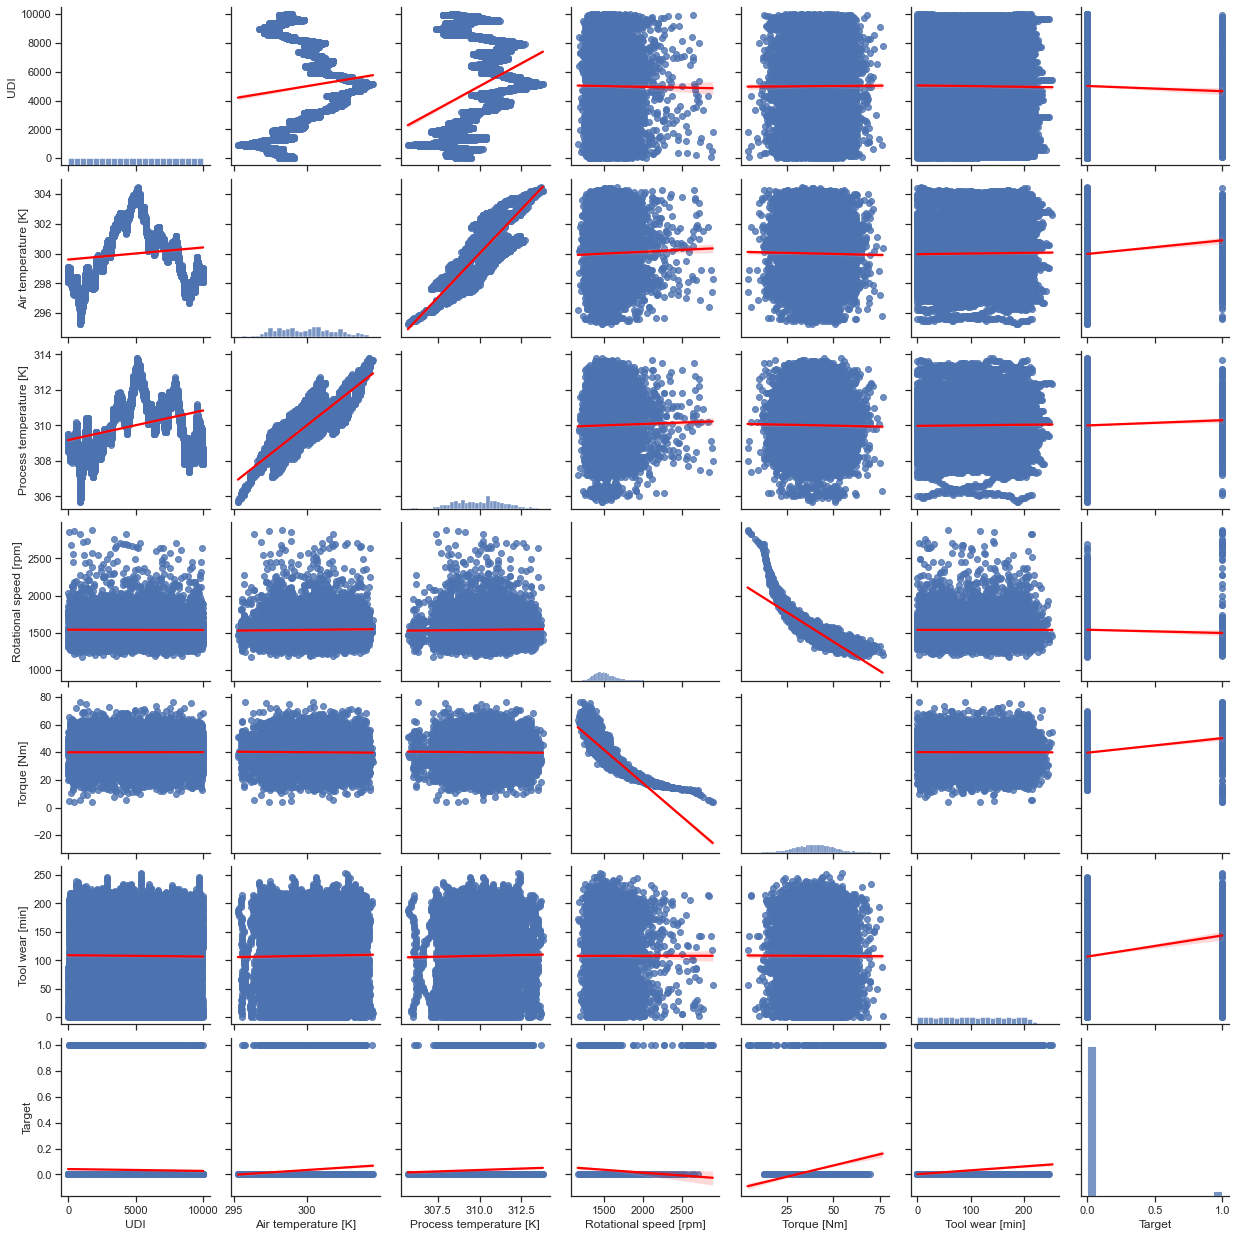

Wall time: 0 ns


In [18]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()
%time

* It seems that Air temperature and Process Temperature are highly positive co-relation.
* Torque and rotational speed have highly positive co-relation.


## Choosing the Right Estimator Model:

I believe this is a decent source to decide how to go about choosing the right estimator:

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

It is interesting to see how one of the target named Target has two possible outcomes: 0 or 1. 
This means that, whatever we want to estimate is basically a classification problem.

On the other hand the second target named: Failure Type has 6 possible outcomes.
This means that, whatever we want to estimate is basically a regression or clustering problem.

### Key Learning: 

* It is also interesting to note that the Type and Failure Type variables are in text format and therefore will require suitable encoding.

In [19]:
df.head(2)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure


### Possible Solution:

* Is to predict target 1 first using suitable classifier.
* Is to predict target 2 by using suitable regressor.

In [20]:
df['Failure Type'].unique()     # for reference

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

## Pre-Processing Steps

* Label Encoding works for Type Variable. L<M<H

* Failure Type has cardinality = 6 which is less than 15. 

So I believe, the best possible encoding is to try out One-Hot Encoding, feature hash encoding and see how the results come along. 

While we could use m-estimator or Target encoding, since they use data from target variables, it can result into data leakage.

For such problems, trial and error is the only way to find out what works the best. Given the time-constraints, I'm going to stick with Label Encoding.

In [21]:
# make a copy of dataframe
df_original = df
df_original.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## MODEL - 1: Predicting Target Variable - SGD Classifier

In [22]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# fitting the encoder to Type column
label_encoder.fit(df['Type'])
df['Type'] = label_encoder.transform(df['Type'])

# Since 'Failure Type' is one of the target variables, we delete it.
df_target = df.drop('Failure Type', 1)

# Product ID will not be useful factor in predicting where target variables in the case.
df_target = df_target.drop('Product ID', 1)

df_target.head()

C:\Users\raghu\AppData\Local\Temp/ipykernel_10688/2634437470.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_target = df.drop('Failure Type', 1)
C:\Users\raghu\AppData\Local\Temp/ipykernel_10688/2634437470.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_target = df_target.drop('Product ID', 1)


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,2,298.1,308.6,1551,42.8,0,0
1,2,1,298.2,308.7,1408,46.3,3,0
2,3,1,298.1,308.5,1498,49.4,5,0
3,4,1,298.2,308.6,1433,39.5,7,0
4,5,1,298.2,308.7,1408,40.0,9,0


In [23]:
# UDI will not be useful factor in predicting where target variables in the case.

df_target = df_target.drop('UDI', 1)

C:\Users\raghu\AppData\Local\Temp/ipykernel_10688/905887767.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_target = df_target.drop('UDI', 1)


In [24]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int32  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 507.9 KB


In [25]:
# Since we only have 10k samples of data, we can go for: SGD Classifier

# Import SGD CLassifier 
from sklearn.linear_model import SGDClassifier

# Setup random seed
np.random.seed(1)

# Create the data
x = df_target.drop("Target", axis = 1)  # predictor variables
y = df_target["Target"]                 # target variable

# Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


'''
 ----------------------------------------------------------------------
loss − str, default = ‘hinge’

It represents the loss function to be used while implementing. The default value is ‘hinge’ which will give us a linear SVM. The other options which can be used are −

    log − This loss will give us logistic regression i.e. a probabilistic classifier.

    modified_huber − a smooth loss that brings tolerance to outliers along with probability estimates.

    squared_hinge − similar to ‘hinge’ loss but it is quadratically penalized.

    perceptron − as the name suggests, it is a linear loss which is used by the perceptron algorithm.
 
 ----------------------------------------------------------------------
penalty − str, ‘none’, ‘l2’, ‘l1’, ‘elasticnet’

It is the regularization term used in the model. By default, it is L2. We can use L1 or ‘elasticnet; as well but both might bring sparsity to the model, hence not achievable with L2.

 ----------------------------------------------------------------------
alpha − float, default = 0.0001

Alpha, the constant that multiplies the regularization term, is the tuning parameter that decides how much we want to penalize the model. The default value is 0.0001.
 ----------------------------------------------------------------------

max_iter − int, optional, default = 1000

As name suggest, it represents the maximum number of passes over the epochs i.e. training data.
 ----------------------------------------------------------------------
'''

# Instantiate Model by creating SGD Classifier object
sgd_clf = SGDClassifier(loss="hinge", penalty = "l2", max_iter = 3)
sgd_clf.fit(x_train, y_train)

C:\Users\raghu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=3)

In [26]:
x_test.head(1)  # for reference

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9953,1,298.1,307.8,1565,35.3,119


In [46]:
# Checking co-efficients: 
sgd_clf.coef_


array([[-4.00016001e-01,  2.53970159e+02,  6.32825313e+01,
        -9.10036401e+02,  2.35629425e+03,  2.28289132e+03]])

In [28]:
# Checking intercept values: 
sgd_clf.intercept_

array([11.28018904])

In [29]:
# Predict on test data
prediction = sgd_clf.predict(x_test)

# Mean Absolute Error, Mean Squared Error and Root Mean Squared Error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5

print(f"MAE = {mae} \nMSE = {mse} \nRMSE = {rmse}")

MAE = 0.0315 
MSE = 0.0315 
RMSE = 0.17748239349298847


In [48]:
sgd_clf.score(y_test, prediction)

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 ... 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
x_test.head(1)  # for reference

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9953,1,298.1,307.8,1565,35.3,119


In [31]:
# Make a prediction on given inputs. Output is a 0 or 1 in a form of array.
sgd_clf.predict([[1, 600, 308, 1600, 500, 119]])

array([1], dtype=int64)

In [32]:
# Save the Model:

from joblib import dump, load
dump(sgd_clf, 'sgd_clf_model_1.joblib')

['sgd_clf_model_1.joblib']

## Further Optimization:

* Using Grid Search CV, we can find out what could be the optimal parameters to feed to the SGD Classifier model.

* We can also compare results of SGD classifier with Kernal Approximation technique: https://scikit-learn.org/stable/modules/kernel_approximation.html

In [ ]:
# ## Grid Search CV

# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler

# # loss
# # penalty
# # max iter

# parameters = [{'loss_types': [3, 5, 7, 9],
#          'knn__weights': ['uniform', 'distance'],
#          'knn__leaf_size': [15, 20]}]

## Model 2: Predicting the Failure Type

In [35]:
# Dropping the target variable this time and keeping the Failure Type Target variable
df_failuretype = df_original.drop('Target', 1)

# Product ID and UDI Column are not of our interest either
df_failuretype = df_failuretype.drop('Product ID', 1)

df_failuretype = df_failuretype.drop('UDI', 1)

df_failuretype.head(1)

C:\Users\raghu\AppData\Local\Temp/ipykernel_10688/4031567767.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_failuretype = df_original.drop('Target', 1)
C:\Users\raghu\AppData\Local\Temp/ipykernel_10688/4031567767.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_failuretype = df_failuretype.drop('Product ID', 1)
C:\Users\raghu\AppData\Local\Temp/ipykernel_10688/4031567767.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_failuretype = df_failuretype.drop('UDI', 1)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,298.1,308.6,1551,42.8,0,No Failure


In [36]:
df_failuretype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int32  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 507.9+ KB


## Pre-Processing - Label Encoding: 

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(df_failuretype['Failure Type'])
df_failuretype['Failure Type'] = label_encoder.transform(df_failuretype['Failure Type'])

df_failuretype.head(1)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,298.1,308.6,1551,42.8,0,1


In [38]:
# Since we only have 10k samples of data, we can go for: SGD Classifier

# Import SGD CLassifier 
from sklearn.linear_model import SGDClassifier

# Setup random seed
np.random.seed(1)

# Create the data
x = df_failuretype.drop("Failure Type", axis = 1)  # predictor variables
y = df_failuretype["Failure Type"]                 # target variable

# Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate Model by creating SGD Classifier object
sgd_clf_2 = SGDClassifier(loss="hinge", penalty = "l2", max_iter = 5)
sgd_clf_2.fit(x_train, y_train)


C:\Users\raghu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5)

In [39]:
# Mean Absolute Error, Mean Squared Error and Root Mean Squared Error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

prediction = sgd_clf_2.predict(x_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5

print(f"MAE = {mae} \nMSE = {mse} \nRMSE = {rmse}")

MAE = 0.06 
MSE = 0.139 
RMSE = 0.372827037646145


In [40]:
x_test.head(1)  # for reference

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9953,1,298.1,307.8,1565,35.3,119


In [41]:
y_test.unique() # for reference

array([1, 2, 3, 5, 0, 4])

In [42]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [43]:
# Make a prediction on given inputs. Output is a 0 or 5 in a form of array.
sgd_clf_2.predict([[2, 350, 308, 1600, 36, 119]])

array([1])

## Conclusion:

Prediction is that for the given inputs there would be No failure.

In [ ]:
# Save the Model:

from joblib import dump, load
dump(sgd_clf_2, 'sgd_clf_model_2.joblib')

## Business Insighhts:

1. One can predict whether or not failure occurs.
2. One can predict which kind of failure can occur.
3. One can see what kind of failure occurs the most, how much money does the company lose(the given dataset may not be sufficient to do this though) by that failure and further do some root cause analytics to solve or minimize the failure from occuring.
4. One can also figure out the when to change the worn tool or optimal tool change time.
5. One can also find out what are the most optimal parameters to machine a given material. 

## 1. Predicting whether or not failure occurs. 

In [54]:


# This prediction takes predictor variables as inputs:

'''
--------------INPUTS-----------
Type: 1
Air Temp = 298.1 K
Process Temp = 307.8 K
Rotational Speed =  1565 rpm
Torque = 35.3
Tool Wear = 119 min
'''

sgd_clf.predict([[1, 600, 308, 1600, 500, 119]])

array([1], dtype=int64)

In [ ]:
# PREDICTION SAYS 1 OR 0. 
# 1 = Failure occurs
# 0 = Failure does not occur.

In [53]:
x_test.head(1)  # for reference

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9953,1,298.1,307.8,1565,35.3,119


## 2. Similarly type of failure can also be predicted

## 3. What kind of failure occurs the most?

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

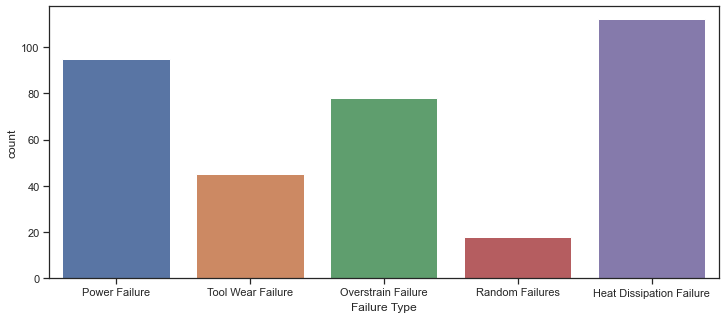

In [55]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plotting the counts
sns.countplot(x = 'Failure Type', data = df_failures_only)

### We can initially find out what are easiest/cheapest failures to solve.

We dont have the economic data to solve this though. We can make assumptions if at all we want approximate solution.

## Example: Most failures occur due to heat dissipation failure.


Lets assume that loss or cost incurred by heat dissipation failure + Power Failure is the 80 % of all the failures that have occured. So solving these eliminates 80 % losses incurred.

## One can also figure out when to change the worn tool or optimal tool change time.

There are standard equations to find out tool changing times. 

* Challenge lies in calculating average cutting time taken by tool. These again depend on speed, feed, depth of cut, tool material, cutting material. Also finishing operations require more time. So it depends on the requirement too.

We just need to customize it depending on the application. Assuming all specimens being cut are same shape for simplicity.


## What are the most optimal parameters to machine for a given material. 



Optimal parameters such as speed, feed, depth of cuts for a standard material has 
been already researched and catalogued in websites like matweb. There are manyf research papers on these too.

* Further we can easily perform design of experiments (l9 or l27, taguchi design) to optimize best values for 3 independent variables.